# <u><center>Superdense Coding</u></center>
- In quantum information theory, superdense coding is a quantum communication protocol to communicate a number of classical bits of information by only transmitting a smaller number of qubits, under the assumption of sender and receiver pre-sharing an entangled resource. 

- In its simplest form, the protocol involves two parties, often referred to as Alice and Bob in this context, which share a pair of maximally entangled qubits, and allows Alice to transmit two bits (i.e., one of 00, 01, 10 or 11) to Bob by sending only one qubit. This protocol was first proposed by Charles H. Bennett and Stephen Wiesner in 1970 (though not published by them until 1992) and experimentally actualized in 1996 by Klaus Mattle, Harald Weinfurter, Paul G. Kwiat and Anton Zeilinger using entangled photon pairs.

- Superdense coding can be thought of as the opposite of quantum teleportation, in which one transfers one qubit from Alice to Bob by communicating two classical bits, as long as Alice and Bob have a pre-shared Bell pair.

- Quantum teleportation and superdense coding are closely related, to avoid confusion we need to clarify the difference.
Quantum teleportation is a process by which the state of qubit can be transmitted from one location to another, using two bits of classical communication and a Bell pair. In other words, we can say it is a protocol that destroys the quantum state of a qubit in one location and recreates it on a qubit at a distant location, with the help of shared entanglement. Superdense coding is a procedure that allows someone to send two classical bits to another party using just a single qubit of communication.


In [1]:
import qiskit as q
import numpy as np
import matplotlib as mpl

In [2]:
# preparation of the random message of be communicated
classical_bits = ['00', '01', '10', '11']

message = np.random.choice(classical_bits)

print(message)

11


In [3]:
# Preparation of iY gate to be used. Note that iY gate is simply X-Z gate. 
# But it's a good exercise to learn how any unitary matrix is converted to a quantum gate.
Y = np.array([
    [0, -1j],
    [1j, 0]])

iY = 1j * Y

iY_op = q.quantum_info.Operator(iY)
print(iY_op)

Operator([[ 0.+0.j,  1.-0.j],
          [-1.+0.j,  0.+0.j]],
         input_dims=(2,), output_dims=(2,))


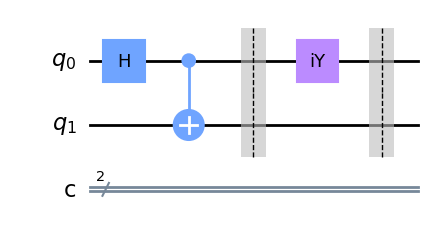

In [4]:
qc = q.QuantumCircuit(2, 2)

# Preparation of entangled qubits to be shared by Alice and Bob
qc.h(0)
qc.cx(0, 1)
qc.barrier()

# Alice performs operations depending upon the message to be communicated
if message == '01':
    qc.z(0)
    qc.barrier()
    
elif message == '10':
    qc.x(0)
    qc.barrier()
    
elif message == '11':
    qc.unitary(iY_op, [0], label='iY')
    qc.barrier()
    
qc.draw(output='mpl')

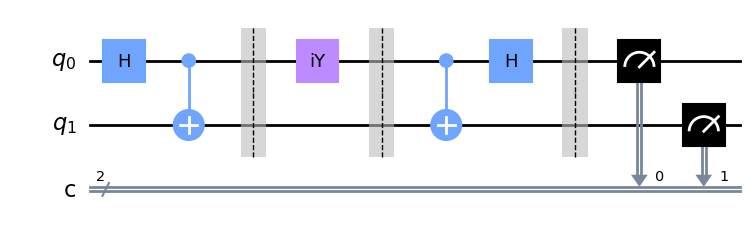

In [5]:
# Alice send her qubit to Bob
# Bob performs operations on the entangled pair
qc.cx(0, 1)
qc.h(0)
qc.barrier()

# Bob measures the qubits to get the message
qc.measure([0, 1], [0, 1])
qc.draw(output='mpl')

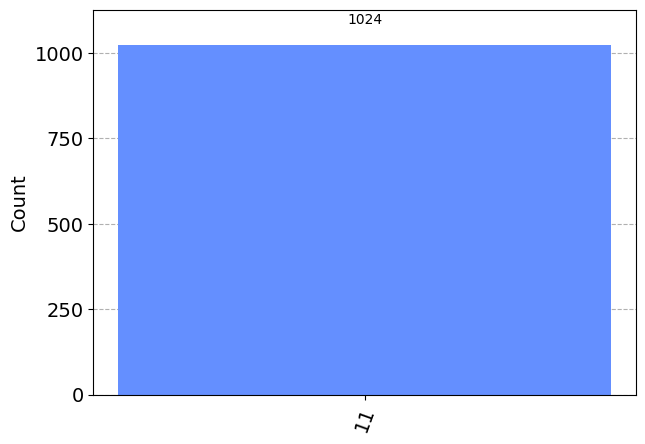

In [6]:
# execute the circuit on a qasm simulator
backend = q.Aer.get_backend('qasm_simulator')
job = q.execute(qc, backend)
result = job.result()
counts = result.get_counts()

graph = q.visualization.plot_histogram(counts)
display(graph)

# The probability of getting the message = 1